RL Train Curve Comparision

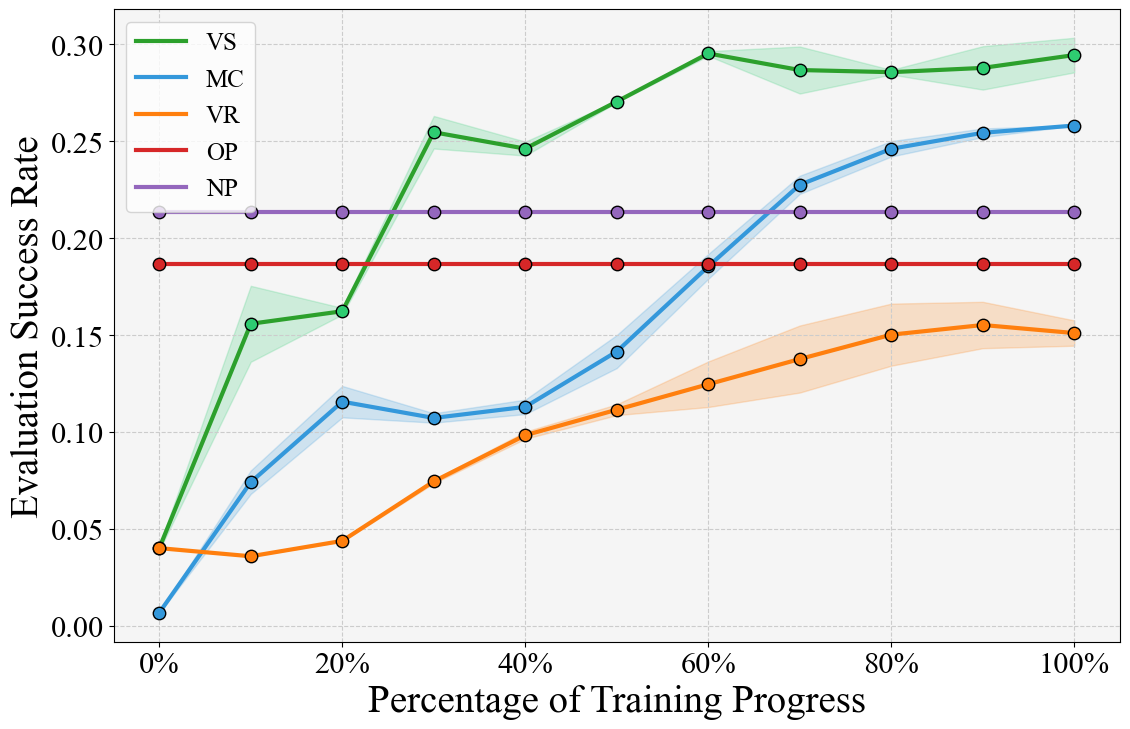

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Function to load data from Final.csv files for each method
def load_final_data(folder, start_row, end_row):
    df = pd.read_csv(f'./RLCurves/{folder}/Final.csv')
    return df['Avg'].iloc[start_row:end_row], df['Var'].iloc[start_row:end_row]

# Load the data from Final.csv for each method
mean_vs, std_vs = load_final_data('VS', 0, 11)  # Rows 2 to 12 (inclusive)
mean_mc, std_mc = load_final_data('MC', 0, 7)  # Rows 2 to 9 (inclusive)
mean_vanilla, std_vanilla = load_final_data('Vanilla', 0, 7)  # Rows 2 to 11 (inclusive)

# Function to interpolate data to 11 points
def interpolate_data(data, num_points=11):
    old_index = np.linspace(0, 100, len(data))
    new_index = np.linspace(0, 100, num_points)
    interpolated = np.interp(new_index, old_index, data)
    return pd.Series(interpolated)

# Interpolate data for each method
mean_vs_interp = interpolate_data(mean_vs)
std_vs_interp = interpolate_data(std_vs)
mean_mc_interp = interpolate_data(mean_mc)
std_mc_interp = interpolate_data(std_mc)
mean_vanilla_interp = interpolate_data(mean_vanilla)
std_vanilla_interp = interpolate_data(std_vanilla)

# Function to apply smoothing (Exponential Weighted Moving Average)
def smooth_data(series, factor=0.9):  # You can adjust the factor
    return series.ewm(alpha=1 - factor).mean()

# Apply smoothing to the interpolated mean data
smoothed_mean_vs = smooth_data(mean_vs_interp)
smoothed_mean_mc = smooth_data(mean_mc_interp)
smoothed_mean_vanilla = smooth_data(mean_vanilla_interp)

# Calculate mean values for OP and NP
mean_op = (0.28 + 0.12 + 0.16) / 3
mean_np = (0.18 + 0.20 + 0.26) / 3

# Create constant series for OP and NP
op_series = pd.Series([mean_op] * 11)
np_series = pd.Series([mean_np] * 11)

# Customize the font globally to use 'serif' as a substitute for 'Times New Roman'
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 30 # Enlarge the font size even more
plt.rcParams['axes.titlesize'] = 28
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22
plt.rcParams['legend.fontsize'] = 18

# Create the plot
plt.figure(figsize=(12, 8))
x = np.linspace(0, 100, 11)

# Set background color
plt.gca().set_facecolor('#F5F5F5')

# Plot for "VS"
plt.plot(x, smoothed_mean_vs, label='VS', color='#2CA02C', linewidth=3)
plt.fill_between(x, smoothed_mean_vs - std_vs_interp, smoothed_mean_vs + std_vs_interp, color='#2ECC71', alpha=0.2)
plt.scatter(x, smoothed_mean_vs, color='#2ECC71', edgecolor='black', s=80, zorder=3)

# Plot for "MC"
plt.plot(x, smoothed_mean_mc, label='MC', color='#3498DB', linewidth=3)
plt.fill_between(x, smoothed_mean_mc - std_mc_interp, smoothed_mean_mc + std_mc_interp, color='#3498DB', alpha=0.2)
plt.scatter(x, smoothed_mean_mc, color='#3498DB', edgecolor='black', s=80, zorder=3)

# Plot for "Vanilla"
plt.plot(x, smoothed_mean_vanilla, label='VR', color='#FF7F0E', linewidth=3)
plt.fill_between(x, smoothed_mean_vanilla - std_vanilla_interp, smoothed_mean_vanilla + std_vanilla_interp, color='#FF7F0E', alpha=0.2)
plt.scatter(x, smoothed_mean_vanilla, color='#FF7F0E', edgecolor='black', s=80, zorder=3)

# Plot for "OP" (solid line with dots)
plt.plot(x, op_series, label='OP', color='#D62728', linewidth=3)
plt.scatter(x, op_series, color='#D62728', edgecolor='black', s=80, zorder=3)

# Plot for "NP" (solid line with dots)
plt.plot(x, np_series, label='NP', color='#9467BD', linewidth=3)
plt.scatter(x, np_series, color='#9467BD', edgecolor='black', s=80, zorder=3)

# Customize the plot
plt.xlabel('Percentage of Training Progress')
plt.ylabel('Evaluation Success Rate')
plt.xticks(np.arange(0, 101, 20), [f'{x}%' for x in range(0, 101, 20)])
plt.yticks()

# Adjust grid line color and transparency
plt.grid(True, linestyle='--', alpha=1.0, color='#CCCCCC')

# Move legend to top left corner inside the figure
plt.legend(loc='upper left')

# Tight layout for better aesthetics
plt.tight_layout()
plt.show()